## HF-L2 comparison:

Shpuld also help us find bad training data.

In [2]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
from gal_goku import summary_stats
importlib.reload(summary_stats)


def compare_HF_L2(mass_pairs = (11.5, 11.5)):
    data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'


    xi = {}
    corrs_hf = []
    corrs_l2 = []
    
    all_sim_nums =[]
    
    xi = summary_stats.Xi(data_dir, fid='HF', narrow=False, logging_level='ERROR')
    corrs_hf = xi.get_xi_r(mass_pairs)[1].squeeze()
    sims_hf = xi.sim_nums
    all_sim_nums.extend(sims_hf)
    xi = summary_stats.Xi(data_dir, fid='L2', narrow=False, logging_level='ERROR')
    corrs_l2_temp = xi.get_xi_r(mass_pairs)[1].squeeze()
    sims_l2 = xi.sim_nums

    ind_comm = np.where(np.isin(sims_l2, sims_hf))[0]
    print(f"Number of common sims: {len(ind_comm)}")
    corrs_l2 = corrs_l2_temp[ind_comm]

    xi = summary_stats.Xi(data_dir, fid='HF', narrow=True, logging_level='ERROR')
    sims_hf = xi.sim_nums
    all_sim_nums.extend(sims_hf)
    corrs_hf = np.vstack((corrs_hf, xi.get_xi_r(mass_pairs)[1].squeeze()))

    xi = summary_stats.Xi(data_dir, fid='L2', narrow=True, logging_level='ERROR')
    sims_l2 = xi.sim_nums
    corrs_l2_temp = xi.get_xi_r(mass_pairs)[1].squeeze()
    ind_comm = np.where(np.isin(sims_l2, sims_hf))[0]
    print(f"Number of common sims (narrow): {len(ind_comm)}")
    corrs_l2 = np.vstack((corrs_l2, corrs_l2_temp[ind_comm]))

    rbins = xi.get_xi_r(mass_pairs)[0]
    return rbins, corrs_hf, corrs_l2, all_sim_nums

rbins, corrs_hf_11_1, corrs_l2_11_1, sim_nums = compare_HF_L2((11.1, 11.1))
rbins, corrs_hf_11_5, corrs_l2_11_5, sim_nums = compare_HF_L2((11.5, 11.5))
rbins, corrs_hf_12, corrs_l2_12, sim_nums = compare_HF_L2((12.0, 12.0))

print(corrs_hf_11_5.shape, corrs_l2_11_5.shape)

2025-08-13 19:57:50.669669: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-13 19:57:50.673008: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-13 19:57:50.682997: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755133070.698887 1187566 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755133070.703597 1187566 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755133070.716639 1187566 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Number of common sims: 21
Number of common sims (narrow): 15
Number of common sims: 21
Number of common sims (narrow): 15
Number of common sims: 21
Number of common sims (narrow): 15
(36, 26) (36, 26)


/tmp/ipykernel_1185047/1372412617.py:12: RuntimeWarning: invalid value encountered in log10
  ax[i, 1].plot(rbins, np.log10(corrs_hf_12[i])  - np.log10(corrs_l2_12[i]), label='HF/L2')


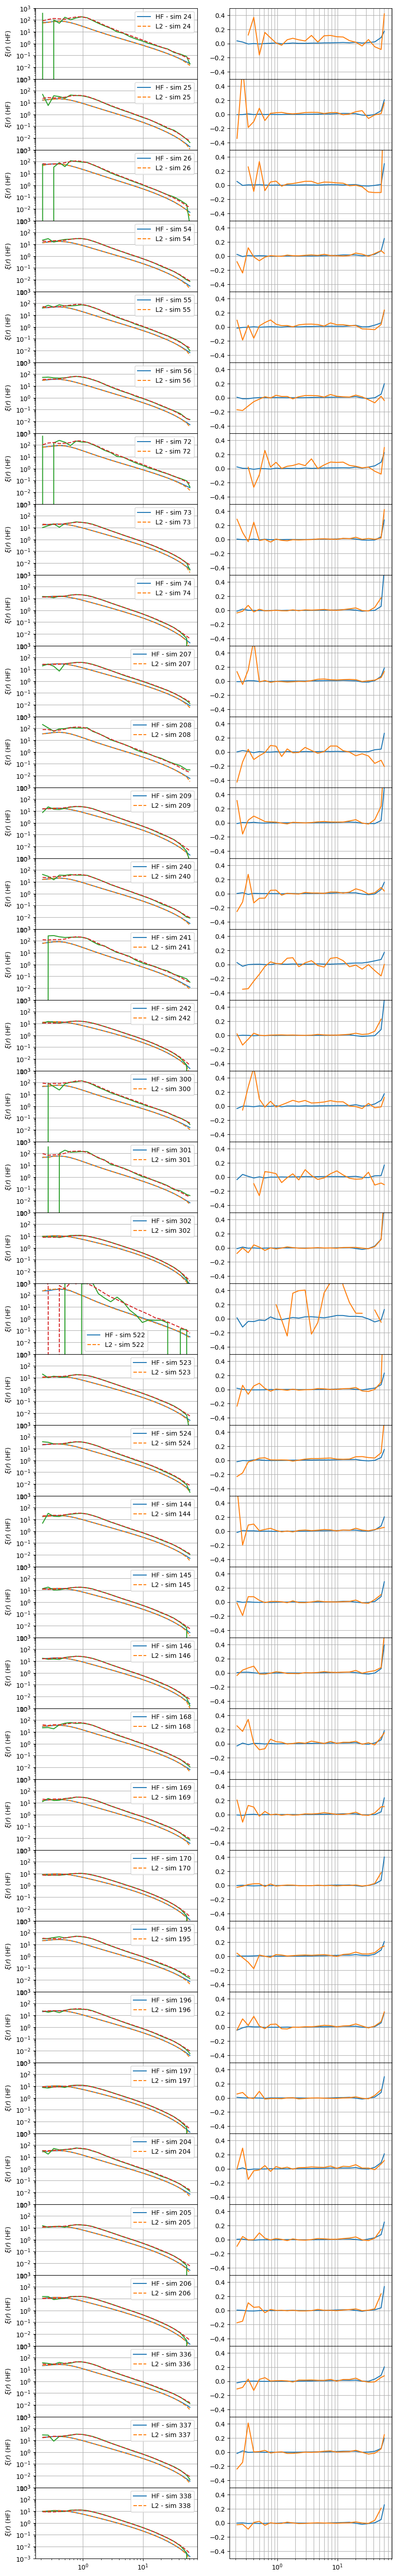

In [36]:
fig, ax = plt.subplots(36, 2, figsize=(10, 72), sharex=True)
plt.subplots_adjust(hspace=0)

for i in range(corrs_hf_11_3.shape[0]):
    ax[i, 0].plot(rbins, corrs_hf_11_1[i], label=f'HF - sim {sim_nums[i]}')
    ax[i, 0].plot(rbins, corrs_l2_11_1[i], label=f'L2 - sim {sim_nums[i]}', ls='--')
    ax[i,0].plot(rbins,  corrs_l2_12[i])
    ax[i, 0].plot(rbins,  corrs_hf_12[i], ls='--')


    ax[i, 1].plot(rbins, np.log10(corrs_hf_11_1[i]) - np.log10(corrs_l2_11_1[i]), label='HF/L2')
    ax[i, 1].plot(rbins, np.log10(corrs_hf_12[i])  - np.log10(corrs_l2_12[i]), label='HF/L2')

    #ax[i, 1].set_ylim((0.5, 1.5))
    ax[i, 1].set_ylim((-0.5, 0.5))
    ax[i, 1].set_xscale('log')
    ax[i, 1].grid(which='both', axis='both')
    ax[i,0].set_ylim(1e-3, 1e3)
    ax[i, 0].set_xscale('log')
    ax[i, 0].set_yscale('log')
    ax[i, 0].set_ylabel(r'$\xi(r)$ (HF)')
    ax[i, 0].legend()
    ax[i, 0].grid()

/tmp/ipykernel_1187566/3326025292.py:13: RuntimeWarning: invalid value encountered in log10
  ax[1].plot(rbins, np.nanmedian(np.log10(frac), axis=0), label='Median', color='C1', lw=2)
/tmp/ipykernel_1187566/3326025292.py:12: RuntimeWarning: invalid value encountered in log10
  ax[1].plot(rbins, np.log10(frac[i]), alpha=0.4, color='C0')
/tmp/ipykernel_1187566/3326025292.py:18: RuntimeWarning: invalid value encountered in log10
  ax[2].plot(rbins, np.log10(frac[i]), alpha=0.4, color='C0')
/tmp/ipykernel_1187566/3326025292.py:19: RuntimeWarning: invalid value encountered in log10
  ax[2].plot(rbins, np.nanmedian(np.log10(frac), axis=0), label='Median', color='C1', lw=2)


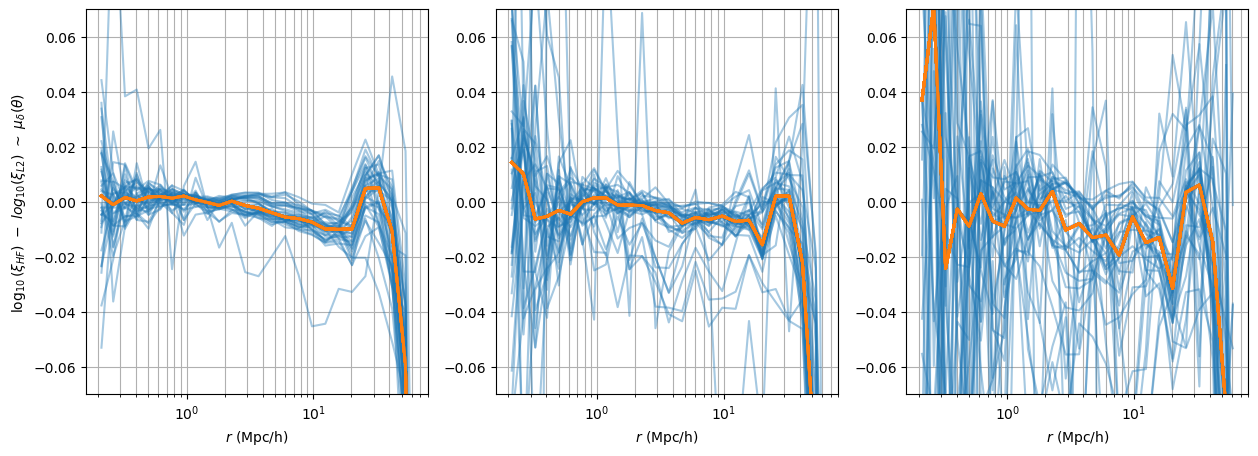

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
plt.subplots_adjust(hspace=0)

frac = corrs_l2_11_1 / corrs_hf_11_1
for i in range(corrs_hf_11_1.shape[0]):
    ax[0].plot(rbins, np.log10(frac[i]), label=f'Sim {sim_nums[i]}', alpha=0.4, color='C0')
    ax[0].plot(rbins, np.nanmedian(np.log10(frac), axis=0), label='Median', color='C1', lw=2)
    #ax[0].plot(rbins, np.nanmean(np.log10(frac), axis=0), label='Mean', color='C2', lw=2)

frac = corrs_l2_11_5 / corrs_hf_11_5
for i in range(corrs_hf_11_5.shape[0]):
    ax[1].plot(rbins, np.log10(frac[i]), alpha=0.4, color='C0')
    ax[1].plot(rbins, np.nanmedian(np.log10(frac), axis=0), label='Median', color='C1', lw=2)
    #ax[1].plot(rbins, np.nanmean(np.log10(frac), axis=0), label='Mean', color='C2', lw=2)

frac = corrs_l2_12 / corrs_hf_12
for i in range(corrs_hf_12.shape[0]):
    ax[2].plot(rbins, np.log10(frac[i]), alpha=0.4, color='C0')
    ax[2].plot(rbins, np.nanmedian(np.log10(frac), axis=0), label='Median', color='C1', lw=2)
    #ax[2].plot(rbins, np.nanmean(np.log10(frac), axis=0), label='Mean', color='C2', lw=2)
for i in range(3):
    ax[i].set_ylim((-0.07, 0.07))
    ax[i].set_xscale('log')
    ax[i].grid(which='both', axis='both')
    ax[i].set_xlabel(r'$r$ (Mpc/h)')
    ax[0].set_ylabel(r'$\log_{10}(\xi_{HF}) \ - \ log_{10}(\xi_{L2}) \ \sim \ \mu_{\delta}(\theta)$')

/tmp/ipykernel_1187566/4072332547.py:8: RuntimeWarning: invalid value encountered in log10
  frac = np.log10(corrs_hf_11_5) / np.log10(corrs_l2_11_5)
/tmp/ipykernel_1187566/4072332547.py:12: RuntimeWarning: invalid value encountered in log10
  frac = np.log10(corrs_hf_12) / np.log10(corrs_l2_12)


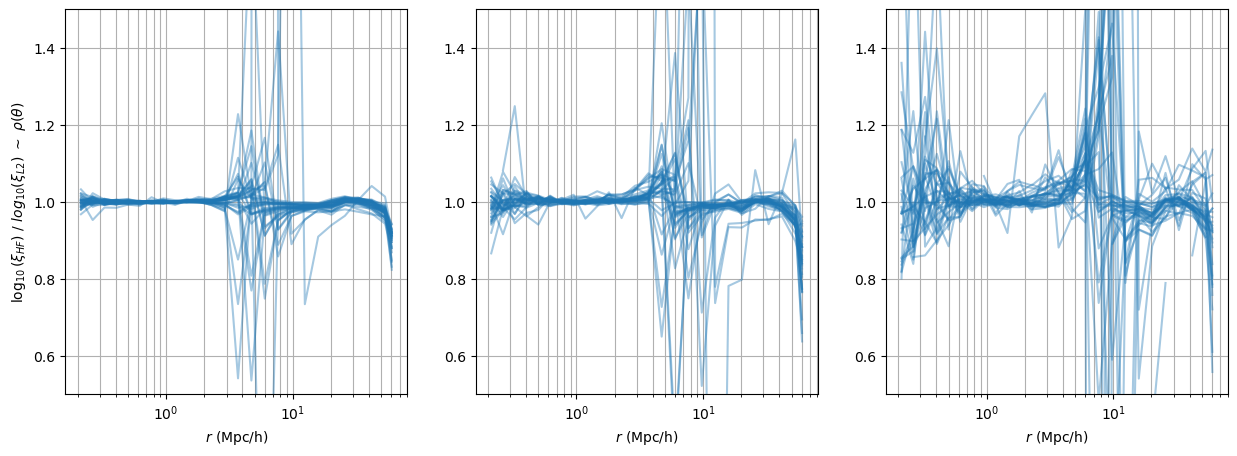

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
plt.subplots_adjust(hspace=0)

frac =  np.log10(corrs_hf_11_1)  / np.log10(corrs_l2_11_1)
for i in range(corrs_hf_11_1.shape[0]):
    ax[0].plot(rbins, frac[i], label=f'Sim {sim_nums[i]}', alpha=0.4, color='C0')

frac = np.log10(corrs_hf_11_5) / np.log10(corrs_l2_11_5)
for i in range(corrs_hf_11_5.shape[0]):
    ax[1].plot(rbins, frac[i], alpha=0.4, color='C0')

frac = np.log10(corrs_hf_12) / np.log10(corrs_l2_12)
for i in range(corrs_hf_12.shape[0]):
    ax[2].plot(rbins, frac[i], alpha=0.4, color='C0')
for i in range(3):
    ax[i].set_ylim((0.5, 1.5))
    ax[i].set_xscale('log')
    ax[i].grid(which='both', axis='both')
    ax[i].set_xlabel(r'$r$ (Mpc/h)')
    ax[0].set_ylabel(r'$\log_{10}(\xi_{HF}) \ / \ log_{10}(\xi_{L2}) \ \sim \ \rho(\theta)$')